In [1]:
# CHEATSHEET --> https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import numpy as np
from sklearn import preprocessing
import folium as folium
import matplotlib.pyplot as plt
import math
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression, PoissonRegressor, BayesianRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [2]:
data = pd.read_csv("./NYPD_arrests_ROBBERY.csv", sep=",")
data = data[["ARREST_DATE"]]

# Remove empty fields, none are empty in this case
data.dropna(inplace=True)

In [3]:
print(data)

       ARREST_DATE
0       10/28/2018
1       10/17/2018
2       09/10/2018
3       02/27/2019
4       02/16/2019
...            ...
161282  01/09/2020
161283  01/03/2020
161284  01/04/2020
161285  01/12/2020
161286  01/09/2020

[161287 rows x 1 columns]


In [4]:
data["ARREST_DATE"] = data["ARREST_DATE"].astype("datetime64").dt.to_period('M')
print(data)


       ARREST_DATE
0          2018-10
1          2018-10
2          2018-09
3          2019-02
4          2019-02
...            ...
161282     2020-01
161283     2020-01
161284     2020-01
161285     2020-01
161286     2020-01

[161287 rows x 1 columns]


In [5]:
date_group = data.groupby("ARREST_DATE")

<AxesSubplot:xlabel='ARREST_DATE'>

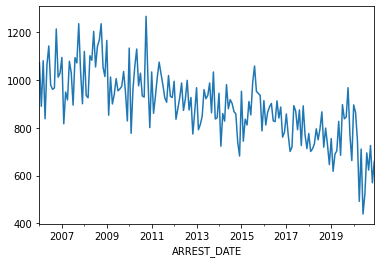

In [6]:
date_group.size().plot()

In [7]:
x = []
y = []
for index, count in enumerate(date_group.size()):
    x.append(index)
    y.append(count)
    print(str(index)+";"+str(count))

0;1072
1;890
2;1081
3;838
4;1063
5;1143
6;979
7;961
8;967
9;1214
10;1012
11;1029
12;1095
13;817
14;950
15;917
16;1079
17;1030
18;895
19;1094
20;1072
21;1236
22;1035
23;901
24;1120
25;935
26;926
27;1102
28;1083
29;1204
30;1055
31;1141
32;1167
33;1236
34;1054
35;1015
36;1166
37;853
38;1013
39;900
40;940
41;1006
42;955
43;963
44;974
45;1036
46;949
47;829
48;1134
49;777
50;963
51;1059
52;1130
53;976
54;1029
55;933
56;929
57;1267
58;1008
59;801
60;1034
61;861
62;932
63;1012
64;1075
65;1026
66;980
67;926
68;907
69;1019
70;932
71;927
72;995
73;836
74;881
75;926
76;988
77;873
78;921
79;999
80;875
81;927
82;774
83;865
84;968
85;792
86;814
87;848
88;960
89;922
90;936
91;988
92;863
93;1034
94;837
95;842
96;945
97;723
98;860
99;828
100;981
101;880
102;918
103;902
104;868
105;858
106;740
107;682
108;953
109;744
110;836
111;812
112;910
113;854
114;989
115;1059
116;953
117;944
118;936
119;787
120;914
121;812
122;865
123;888
124;902
125;829
126;826
127;913
128;841
129;887
130;761
131;782
132;858
133;7

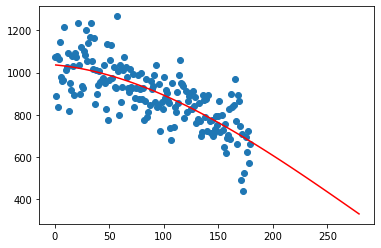

In [8]:
mymodel = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(1, 279, 100)

plt.plot(myline, mymodel(myline), color="red")
plt.scatter(x, y)
plt.show()

In [9]:
X = np.array(x)
X = X.reshape(-1, 1)
print(y)
poisson = PoissonRegressor().fit(X, y)

print("PoissonRegressor evaluation:")
poisson.score(X, y)

[1072, 890, 1081, 838, 1063, 1143, 979, 961, 967, 1214, 1012, 1029, 1095, 817, 950, 917, 1079, 1030, 895, 1094, 1072, 1236, 1035, 901, 1120, 935, 926, 1102, 1083, 1204, 1055, 1141, 1167, 1236, 1054, 1015, 1166, 853, 1013, 900, 940, 1006, 955, 963, 974, 1036, 949, 829, 1134, 777, 963, 1059, 1130, 976, 1029, 933, 929, 1267, 1008, 801, 1034, 861, 932, 1012, 1075, 1026, 980, 926, 907, 1019, 932, 927, 995, 836, 881, 926, 988, 873, 921, 999, 875, 927, 774, 865, 968, 792, 814, 848, 960, 922, 936, 988, 863, 1034, 837, 842, 945, 723, 860, 828, 981, 880, 918, 902, 868, 858, 740, 682, 953, 744, 836, 812, 910, 854, 989, 1059, 953, 944, 936, 787, 914, 812, 865, 888, 902, 829, 826, 913, 841, 887, 761, 782, 858, 771, 701, 719, 893, 870, 792, 875, 726, 892, 771, 713, 776, 701, 712, 733, 796, 750, 796, 867, 719, 799, 729, 646, 755, 618, 690, 704, 827, 685, 897, 838, 845, 968, 769, 663, 896, 865, 748, 492, 711, 439, 523, 695, 623, 726, 570, 660]
PoissonRegressor evaluation:


0.5329862408573849

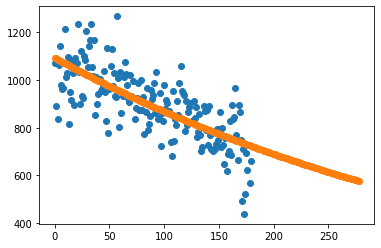

In [10]:
possion_predict = poisson.predict(X)
myline = [[i] for i in range(0, 279)]
plt.scatter(x, y)
plt.scatter(myline, poisson.predict(myline))
plt.show()